In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Blinkit is trying to find an optimal number of delivery partners per store for faster delivery

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
!gdown 1ZdhRqYv-JizWV6DxO6C4R_k1kxPhmlF2


Downloading...
From: https://drive.google.com/uc?id=1ZdhRqYv-JizWV6DxO6C4R_k1kxPhmlF2
To: /content/multiclass.csv
100% 14.6k/14.6k [00:00<00:00, 37.5MB/s]


In [ ]:
df=pd.read_csv('multiclass.csv')
df.head()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,class
0,3,12669,9656,7561,214,2674,1338,2
1,3,7057,9810,9568,1762,3293,1776,2
2,3,6353,8808,7684,2405,3516,7844,2
3,3,13265,1196,4221,6404,507,1788,1
4,3,22615,5410,7198,3915,1777,5185,1


Now lets see the count of sample each of the three classes

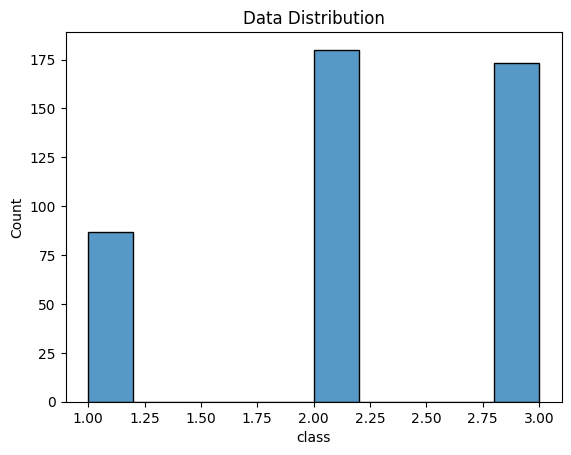

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=df, x="class")
plt.title('Data Distribution')
plt.show()

In [ ]:
x=df[['Region',	'Fresh',	'Milk',	'Grocery',	'Frozen',	'Detergents_Paper',	'Delicassen'	]].copy()
y=df[['class']].copy()

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


def scatter_visualize(visualize1,visualize2,y_label):
  scatter = plt.scatter(visualize[:,0] ,visualize[:,1],c = y.values[:,0] )
  plt.legend(handles=scatter.legend_elements()[0], labels=['Class1','Class2','Class3'])
  plt.show()

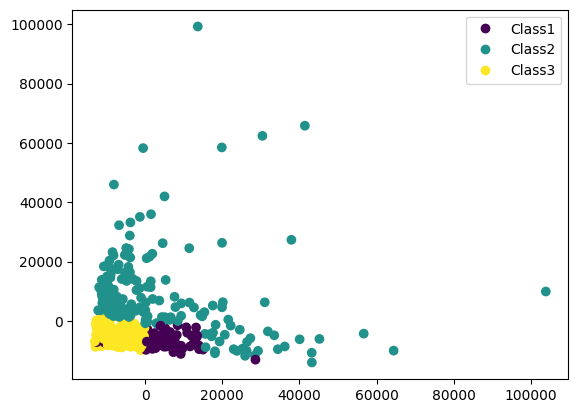

In [ ]:
# reducing features to just 2 features for visualization purpose
pca = PCA(n_components=2)
visualize = pca.fit_transform(x)


scatter_visualize(visualize[:,0] ,visualize[:,1],y.values[:,0])



In [ ]:
#Data is not only multi classed imbalanced data It is also Non-Linear in nature

In [ ]:
#KNN

In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

x_train_val, x_test, y_train_val, y_test = train_test_split(x,y,test_size=0.25, random_state=42)

x_train, x_val, y_train, y_val = train_test_split(x_train_val,y_train_val,test_size=0.25, random_state=42)

In [ ]:
print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)
print(x_test.shape, y_test.shape)

(247, 7) (247, 1)
(83, 7) (83, 1)
(110, 7) (110, 1)


In [ ]:
#SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

# Create an instance of SMOTE
smt = SMOTE()

x_sm, y_sm = smt.fit_resample(x_train, y_train)

In [ ]:
y_sm.value_counts()

class
1        99
2        99
3        99
dtype: int64

In [ ]:
#Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler

st =  StandardScaler()

x_sm = st.fit_transform(x_sm.values)
x_val_scaled = st.transform(x_val.values)
x_test_scaled = st.transform(x_test.values)

y_sm = y_sm.values[:,0]
y_val = y_val.values[:,0]
y_test = y_test.values[:,0]

In [ ]:
x_val_scaled[50]

array([ 0.71362033, -0.60158939, -0.44234022, -0.64539584, -0.30559443,
       -0.49990021, -0.26418778])

In [ ]:
dist = np.sqrt(np.sum((x_val_scaled[50]-x_sm)**2,axis=1) )

print(dist.shape)

(297,)


In [ ]:
# Storing distance and Class labels together
distances = [(dist[i],y_sm[i]) for i in range(len(dist)) ]

# sort the distances
distances = sorted(distances)

In [ ]:
# Nearest/First K points
distances = distances[:5]

In [ ]:
distances = np.array(distances)

classes_counts = np.unique(distances[:,1],return_counts=True)

index = classes_counts[1].argmax()
pred = classes_counts[0][index]

print('kNN prediction:',pred)

kNN prediction: 3.0


In [ ]:
print('Neighbors[(distance),(Label)]:',distances)

Neighbors[(distance),(Label)]: [[0.20122282 3.        ]
 [0.21397568 3.        ]
 [0.23188448 3.        ]
 [0.2870975  3.        ]
 [0.29614245 3.        ]]


In [ ]:
def knn(x,y,queryPoint,k):
    """Predict the class label for the query point"""
    # Euclidean Distance
    dist = np.sqrt(np.sum((queryPoint-x)**2,axis=1) )

    # Storing distance and Class labels together
    distances = [(dist[i],y[i]) for i in range(len(dist)) ]
    # sort the distances
    distances = sorted(distances)
    # Nearest/First K points
    distances = distances[:k]

    distances = np.array(distances)

    classes_counts = np.unique(distances[:,1],return_counts=True)

    index = classes_counts[1].argmax()
    pred = classes_counts[0][index]

    return int(pred),distances

In [ ]:
pred,neighbors = knn(x_sm, y_sm, x_val_scaled[50],5)

print(f'k nearest neighbors with the distance and class label :{neighbors}')

print(f'The predicted class label: {pred}')

k nearest neighbors with the distance and class label :[[0.20122282 3.        ]
 [0.21397568 3.        ]
 [0.23188448 3.        ]
 [0.2870975  3.        ]
 [0.29614245 3.        ]]
The predicted class label: 3


In [ ]:
y_val[50]

3

In [ ]:
#This means that kNN correctly predicted

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred = []

for i in range(x_test_scaled.shape[0]):
    output,_ = knn(x_sm, y_sm, x_test_scaled[i],5)
    y_pred.append(output)




cm = confusion_matrix(y_test,y_pred)


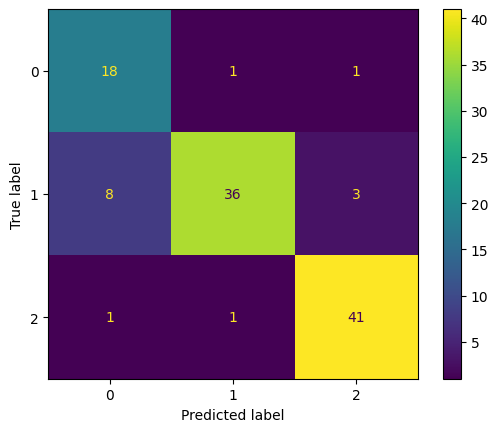

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay(cm).plot()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           1       0.90      0.67      0.77        27
           2       0.77      0.95      0.85        38
           3       0.95      0.91      0.93        45

    accuracy                           0.86       110
   macro avg       0.87      0.84      0.85       110
weighted avg       0.88      0.86      0.86       110



In [ ]:
#Clearly the kNN model performed quite well on the data

In [ ]:
#Sklearn's KNN implementation

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5,metric='euclidean')

knn.fit(x_sm, y_sm)


KNeighborsClassifier(metric='euclidean')

In [ ]:
#Accuracy of KNN on Test data

In [ ]:
knn.score(x_val_scaled, y_val)

0.891566265060241

In [ ]:
#Precision, Recall, F1-Score of KNN on test data

In [ ]:
from sklearn.metrics import classification_report

y_pred = knn.predict(x_val_scaled)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           1       0.71      0.86      0.77        14
           2       0.97      0.89      0.93        38
           3       0.90      0.90      0.90        31

    accuracy                           0.89        83
   macro avg       0.86      0.89      0.87        83
weighted avg       0.90      0.89      0.89        83



In [ ]:
#confusion matrix on KNN

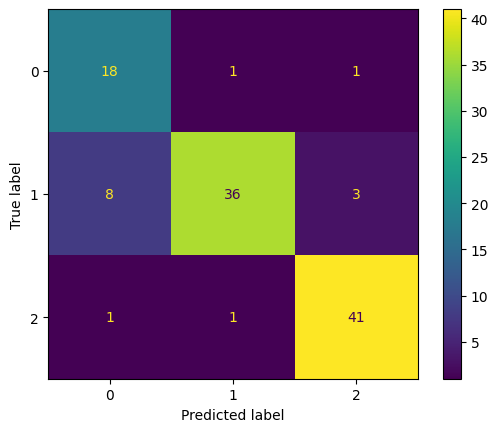

In [ ]:
y_pred = knn.predict(x_test_scaled)

cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(cm).plot()

In [ ]:
#The model makes wrong prediction mostly on Class 1

In [ ]:
#Bias-Variance Trade Off in kNN

Hyperparameter tuning of kNN

In [ ]:
Acc = []

# Calculating error for K values between 1 and 50
# Note: 51 is not included in the loop
for i in range(1, 51):
    knn = KNeighborsClassifier(n_neighbors=i,metric='euclidean')
    knn.fit(x_sm, y_sm)

    Acc.append(knn.score(x_val_scaled,y_val))

In [ ]:
#Visualizing the error and K values

Text(0, 0.5, 'Accuracy')

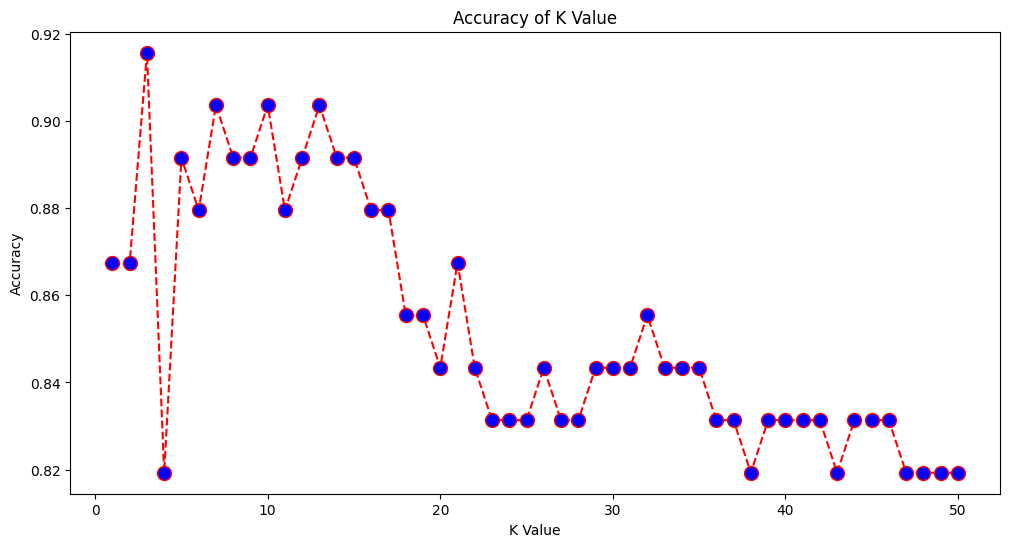

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 51), Acc, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Accuracy of K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')

In [ ]:
#Highest accuracy attained when  k=5
#Meaning our intial kNN is the best model

In [ ]:
#Decision Boundary plot

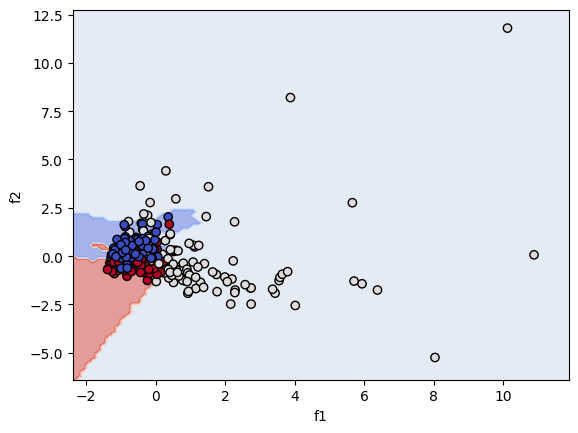

In [ ]:
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.neighbors import KNeighborsClassifier

# Choosing the first 2 columns for the plot


pca = PCA(n_components=2)
x_train_cols = pca.fit_transform(x_sm)

# Creating and fitting the tree classifier

classifier = KNeighborsClassifier(n_neighbors=5,metric='euclidean')

classifier.fit(x_train_cols, y_sm)

# Plotting the tree boundaries
disp = DecisionBoundaryDisplay.from_estimator(classifier,
                                              x_train_cols,
                                              response_method="predict",
                                              xlabel='f1', ylabel='f2',
                                              alpha=0.5,
                                              cmap=plt.cm.coolwarm)

# Plotting the data points
disp.ax_.scatter(x_train_cols[:, 0], X_train_cols[:, 1],
                 c=y_sm, edgecolor="k",
                 cmap=plt.cm.coolwarm)


plt.show()

In [ ]:
#KNN imputator

In [ ]:
!gdown 1vDIXh1yJxLpmgdh3gZGM6WX0u3GCPuIS


Downloading...
From: https://drive.google.com/uc?id=1vDIXh1yJxLpmgdh3gZGM6WX0u3GCPuIS
To: /content/knn_imputation.csv
100% 12.9k/12.9k [00:00<00:00, 34.7MB/s]


In [ ]:
import pandas as pd
import numpy as np

df_imp = pd.read_csv('knn_imputation.csv')
df_imp.drop(['Unnamed: 0'],axis=1,inplace=True)

In [ ]:
df_imp.head()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,3.0,12669.0,9656.0,7561.0,214.0,2674.0,1338.0
1,3.0,7057.0,9810.0,9568.0,1762.0,3293.0,1776.0
2,3.0,6353.0,8808.0,NaN,2405.0,3516.0,7844.0
3,3.0,13265.0,1196.0,4221.0,6404.0,507.0,1788.0
4,3.0,22615.0,5410.0,7198.0,3915.0,1777.0,5185.0


In [ ]:
df_imp.isna().sum()

Region               8
Fresh               13
Milk                15
Grocery              9
Frozen               8
Detergents_Paper    10
Delicassen          11
dtype: int64

In [ ]:
#We have nan values for every feature
#Lets see if kNN can impute these missing values

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

# Create the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Step 1: StandardScaler for feature scaling
    ('imputer', KNNImputer(n_neighbors=5))  # Step 2: KNNImputer for missing value imputation
])

# Fit and transform the data using the pipeline
x_transformed = pipeline.fit_transform(df_imp)

# Creating dataframe
x_transformed = pd.DataFrame(x_transformed,columns=df_imp.columns)

In [ ]:
x_transformed.head()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.555438,-0.233395,0.187310,-0.319038,-0.554681,-0.272830,-0.175386
1,0.555438,-0.616431,0.204632,-0.139260,-0.281917,-0.165147,-0.051741
2,0.555438,-0.664481,0.091925,0.200717,-0.168617,-0.126353,1.661231
3,0.555438,-0.192716,-0.764292,-0.618222,0.536025,-0.649809,-0.048353
4,0.555438,0.445450,-0.290291,-0.351554,0.097452,-0.428875,0.910606


In [ ]:
x_transformed.isna().sum()


Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [ ]:
#kNN imputes every missing value for every feature
#This shows how good kNNImputator is

In [ ]:
# Employee Attrition

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import io

In [ ]:
!gdown 16KtxSt_QEGQvfluEaMls5cCHPwhRXgCk

Downloading...
From: https://drive.google.com/uc?id=16KtxSt_QEGQvfluEaMls5cCHPwhRXgCk
To: /content/HR-Employee-Attrition.csv
100% 228k/228k [00:00<00:00, 79.8MB/s]


In [ ]:
df = pd.read_csv("HR-Employee-Attrition.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
!gdown 19L3rYatfhbBL1r5MHrv-p_oM2wlvrhqk
!gdown 1OHLKJwA3qZopKPvlKoRldM6BvA1A4dYF
!gdown 1N7O_fWCTJLu8SIa_paKcDEzllgpMk8sK
!gdown 12Bh2AN8LcZAlg20ehpQrEWccUDaSdsOG

Downloading...
From: https://drive.google.com/uc?id=19L3rYatfhbBL1r5MHrv-p_oM2wlvrhqk
To: /content/preprocessed_X_sm.pickle
100% 534k/534k [00:00<00:00, 104MB/s]
Downloading...
From: https://drive.google.com/uc?id=1OHLKJwA3qZopKPvlKoRldM6BvA1A4dYF
To: /content/X_test.pickle
100% 111k/111k [00:00<00:00, 72.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1N7O_fWCTJLu8SIa_paKcDEzllgpMk8sK
To: /content/y_sm.pickle
100% 15.4k/15.4k [00:00<00:00, 35.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=12Bh2AN8LcZAlg20ehpQrEWccUDaSdsOG
To: /content/y_test.pickle
100% 9.49k/9.49k [00:00<00:00, 17.8MB/s]


In [ ]:
#Final dataset after preprocessing

In [ ]:
import pickle
# Load data (deserialize)
with open('preprocessed_X_sm.pickle', 'rb') as handle:
    x_train = pickle.load(handle)

with open('X_test.pickle', 'rb') as handle:
    x_test = pickle.load(handle)

with open('y_sm.pickle', 'rb') as handle:
    y_train = pickle.load(handle)

with open('y_test.pickle', 'rb') as handle:
    y_test = pickle.load(handle)

In [ ]:
# train data shape
x_train.shape

(1848, 36)

In [ ]:
# test data shape
x_test.shape

(368, 36)

In [ ]:
x_train.head()

,Age,DailyRate,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,36,1174,3,4,0.233871,1,0,99,3,2,...,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,21,546,5,1,0.127479,3,1,97,3,1,...,2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,43,422,1,3,0.151584,4,0,33,3,2,...,2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,42,188,29,3,0.127479,2,1,56,1,2,...,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,35,992,1,3,0.127479,4,1,68,2,1,...,2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [ ]:
#Sklearn implemenation

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model = DecisionTreeClassifier(criterion='entropy')

In [ ]:
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
model.score(x_test, y_test)

0.7717391304347826

In [ ]:
model.score(x_train, y_train)

1.0

In [ ]:
#Visualizing DT

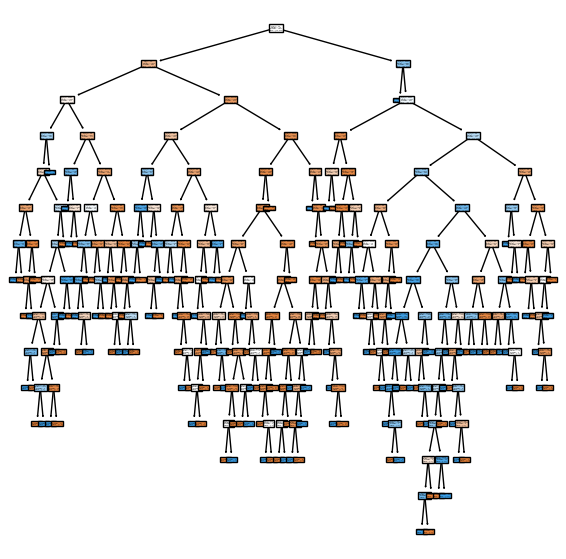

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(7,7))
plot_tree(model, filled = True);

In [ ]:
# model is overfitting

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_validate, cross_val_score

kfold = KFold(n_splits=10)

depths = [3,4,5,67,9,11,13,15]

for depth in depths:
    tree_clf = DecisionTreeClassifier(random_state=7, max_depth=depth)

    cv_acc_results = cross_validate(tree_clf, x_train, y_train, cv = kfold, scoring = 'accuracy', return_train_score = True)

    print(f"K-Fold for depth:{depth} Accuracy Mean: Train: {cv_acc_results['train_score'].mean()*100} Validation: {cv_acc_results['test_score'].mean()*100}")
    print(f"K-Fold for depth: {depth} Accuracy Std: Train: {cv_acc_results['train_score'].std()*100} Validation: {cv_acc_results['test_score'].std()*100}")
    print('***************')

K-Fold for depth:3 Accuracy Mean: Train: 78.23483177413387 Validation: 76.47326674500587
K-Fold for depth: 3 Accuracy Std: Train: 1.203088267164511 Validation: 11.331241420327677
***************
K-Fold for depth:4 Accuracy Mean: Train: 83.50772540936214 Validation: 80.58049353701529
K-Fold for depth: 4 Accuracy Std: Train: 0.7889219949763586 Validation: 6.337951865133366
***************
K-Fold for depth:5 Accuracy Mean: Train: 87.36180052847033 Validation: 81.88366627497062
K-Fold for depth: 5 Accuracy Std: Train: 0.7888615077334944 Validation: 7.73770036081666
***************
K-Fold for depth:67 Accuracy Mean: Train: 100.0 Validation: 83.1316098707403
K-Fold for depth: 67 Accuracy Std: Train: 0.0 Validation: 10.55717457918392
***************
K-Fold for depth:9 Accuracy Mean: Train: 97.31242628012397 Validation: 83.7256169212691
K-Fold for depth: 9 Accuracy Std: Train: 0.3868329573758325 Validation: 10.103313333296661
***************
K-Fold for depth:11 Accuracy Mean: Train: 99.1101215

In [ ]:
# Training with the best parameters -

In [ ]:
tree_clf = DecisionTreeClassifier(random_state=7, max_depth=4)
tree_clf=tree_clf.fit(x_train, y_train)
pred = tree_clf.predict(x_test)

In [ ]:
# How to visualize a DT?

In [ ]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydot

features = list(x_train.columns)

# Ensure the target variable 'Attrition' is not there in the feature list

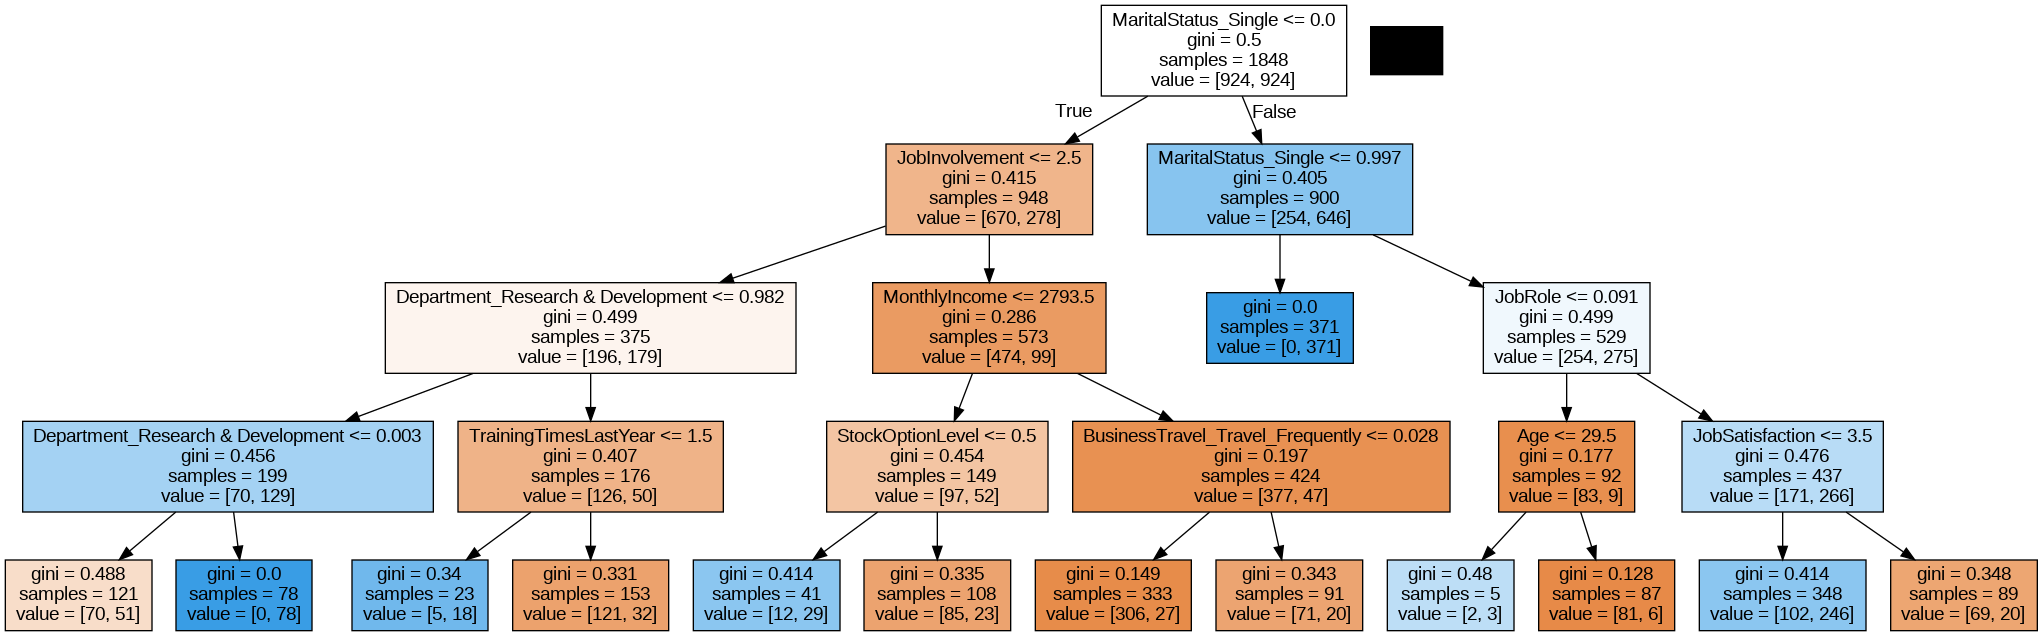

In [ ]:
dot_data = StringIO()
export_graphviz(tree_clf, out_file=dot_data, feature_names=features, filled=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

Text(0.5, 23.52222222222222, 'Predicted label')

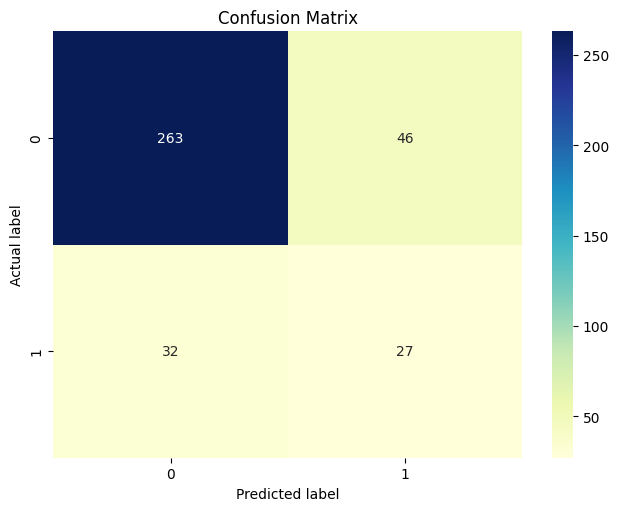

In [ ]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cnf_matrix = confusion_matrix(y_test, pred)
fig, ax = plt.subplots()

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')

plt.tight_layout()
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
# Model is classifying class 0 quite well

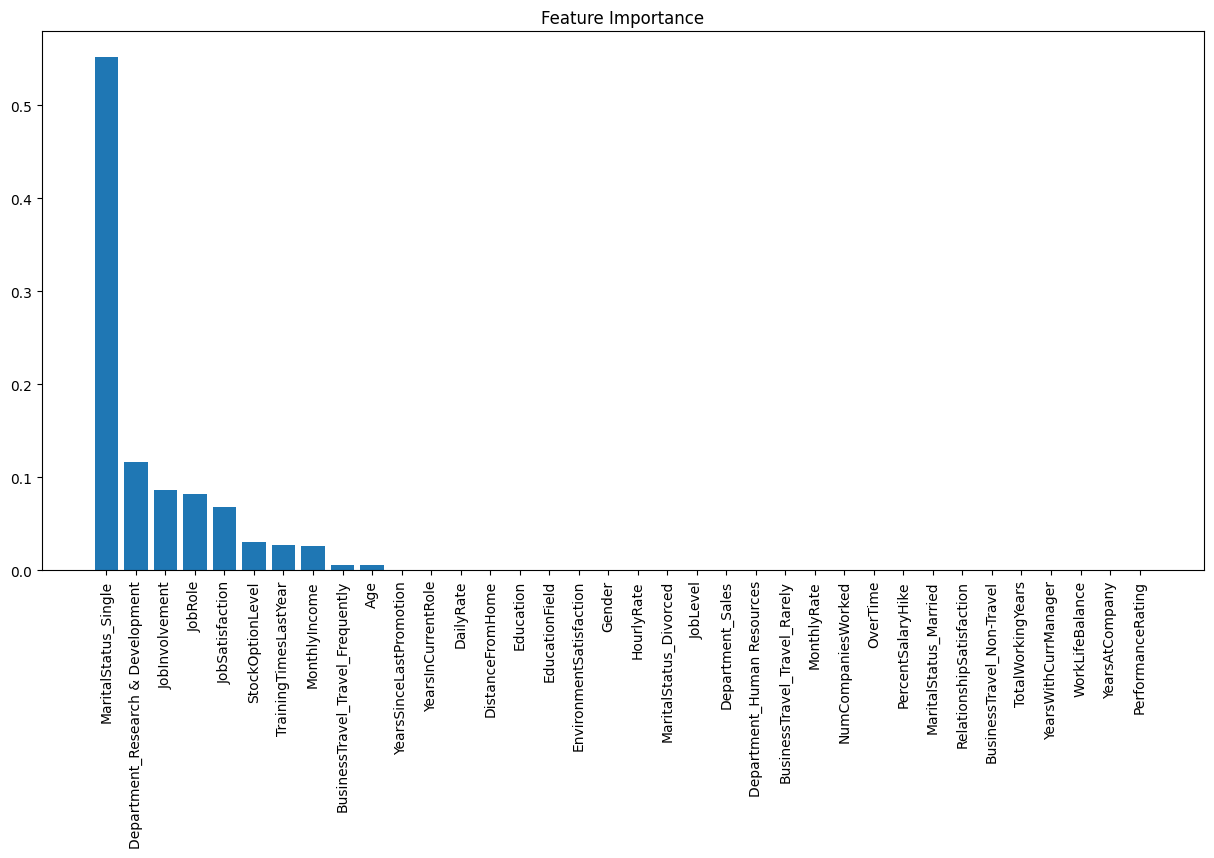

In [ ]:
importances = tree_clf.feature_importances_
indices = np.argsort(importances)[::-1] # Sort feature importances in descending order
names = [x_train.columns[i] for i in indices] # Rearrange feature names so they match the sorted feature importances

plt.figure(figsize=(15, 7)) # Create plot
plt.title("Feature Importance") # Create plot title
plt.bar(range(x_train.shape[1]), importances[indices]) # Add bars
plt.xticks(range(x_train.shape[1]), names, rotation=90) # Add feature names as x-axis labels
plt.show() # Show plot

In [ ]:
df_param_coeff = pd.DataFrame(columns=['Feature', 'Coefficient'])
for i in range(len(list(x_train.columns))):
    feat = x_train.columns[i]
    coeff = importances[i]
    df_param_coeff.loc[i] = (feat, coeff)
df_param_coeff.sort_values(by='Coefficient', ascending=False, inplace=True)
df_param_coeff = df_param_coeff.reset_index(drop=True)
df_param_coeff.head(10)

,Feature,Coefficient
0,MaritalStatus_Single,0.551861
1,Department_Research & Development,0.116828
2,JobInvolvement,0.086921
3,JobRole,0.082005
4,JobSatisfaction,0.068126
5,StockOptionLevel,0.030027
6,TrainingTimesLastYear,0.027184
7,MonthlyIncome,0.025852
8,BusinessTravel_Travel_Frequently,0.005684
9,Age,0.005513


In [ ]:
# MaritalStatus_Single is the most important feature.
# Followed by Department_Research & Development, JobInvolvement and JobRole.

In [ ]:
# Sklearn Implementation

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, cross_validate
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
!gdown 176WcJFfaSz3YkO1TiGEg_EqWgJ4YQEwO

Downloading...
From: https://drive.google.com/uc?id=176WcJFfaSz3YkO1TiGEg_EqWgJ4YQEwO
To: /content/regData.csv
100% 13.4k/13.4k [00:00<00:00, 17.7MB/s]


In [ ]:
regression_data = pd.read_csv('regData.csv')

In [ ]:
regression_data.head()

,X,Y
0,1,1.018138
1,2,0.813685
2,3,0.795484
3,4,0.860005
4,5,0.990648


In [ ]:
regression_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       600 non-null    int64  
 1   Y       600 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 9.5 KB


There are total of 600 datapoints

In [ ]:
x= regression_data['X']
y= regression_data['Y']

In [ ]:
#Plotting data

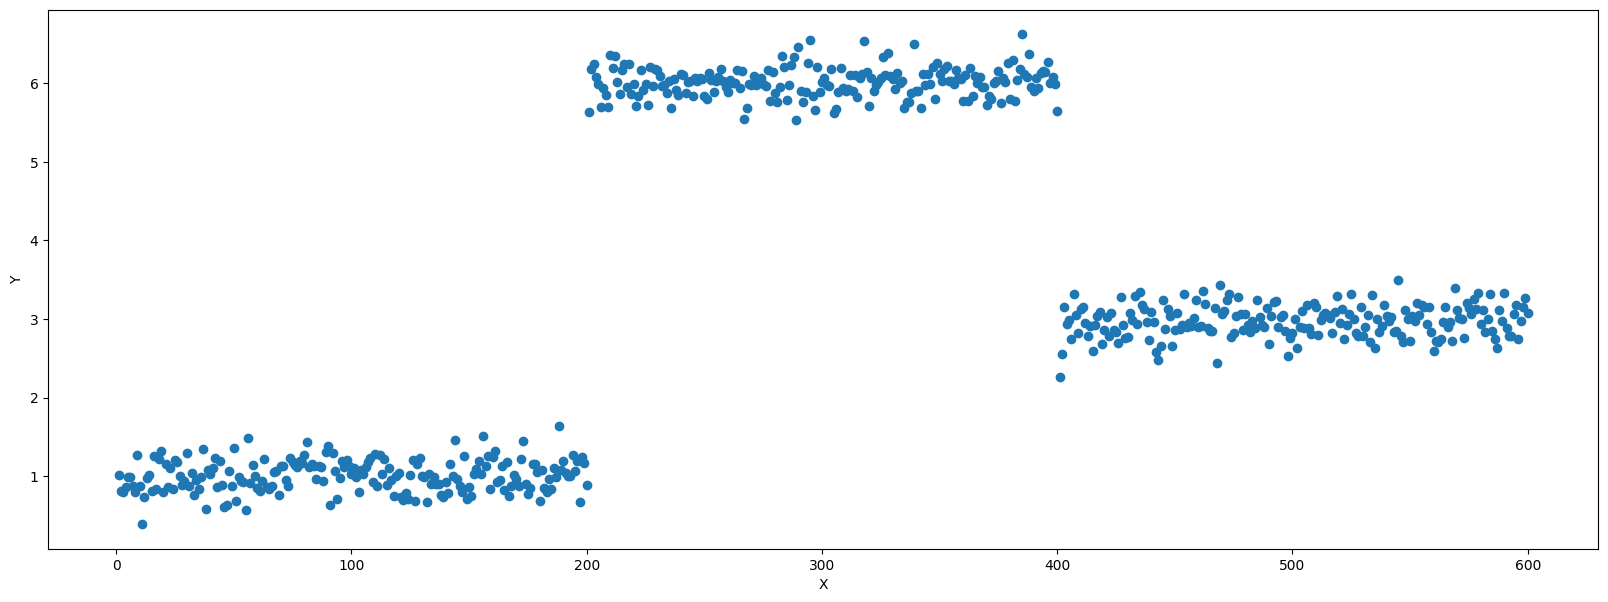

In [ ]:
plt.figure(figsize = (20,7))
plt.scatter(x,y)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [ ]:
#simple linear regrssion wont fit this data

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=43,
                                                    shuffle = True)

In [ ]:
x_train = x_train.values.reshape(-1,1)

In [ ]:
y_train = y_train.values

In [ ]:
depths = [1,2,3,5,6,7,9,11]

for depth in depths:
    tree_reg = DecisionTreeRegressor(random_state=7, max_depth = depth, min_samples_split = 10, min_samples_leaf = 20)

    kfold = KFold(n_splits=3)

    # scoring is taken as negative mse as we maximize the scoring. maximizing negative MSE is same as minimizing MSE.
    cv_acc_results = cross_validate(tree_reg, x_train, y_train, cv = kfold, scoring = 'neg_mean_squared_error', return_train_score = True)

    print(f"K-Fold for depth:{depth} -ve MSE Mean: Train: {cv_acc_results['train_score'].mean()*100} Validation: {cv_acc_results['test_score'].mean()*100}")
    print('***************')

K-Fold for depth:1 -ve MSE Mean: Train: -157.29484407813618 Validation: -161.85220982964185
***************
K-Fold for depth:2 -ve MSE Mean: Train: -4.022779524301007 Validation: -13.41631105078697
***************
K-Fold for depth:3 -ve MSE Mean: Train: -3.889896491712604 Validation: -13.530023054703413
***************
K-Fold for depth:5 -ve MSE Mean: Train: -3.802910351858201 Validation: -13.515703625248829
***************
K-Fold for depth:6 -ve MSE Mean: Train: -3.802910351858201 Validation: -13.515703625248829
***************
K-Fold for depth:7 -ve MSE Mean: Train: -3.802910351858201 Validation: -13.515703625248829
***************
K-Fold for depth:9 -ve MSE Mean: Train: -3.802910351858201 Validation: -13.515703625248829
***************
K-Fold for depth:11 -ve MSE Mean: Train: -3.802910351858201 Validation: -13.515703625248829
***************


In [ ]:
#the regressor is overfitting. This could be bcoz we have very less datapoints for training.
# so try tuning the hyperparameters.

In [ ]:
#Visualizing Decision Tree

In [ ]:
features = list(regression_data.columns[0])

In [ ]:
tree_reg = DecisionTreeRegressor(random_state=7, max_depth = 2, min_samples_split = 20 )
tree_reg.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=2, min_samples_split=20, random_state=7)

In [ ]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydot

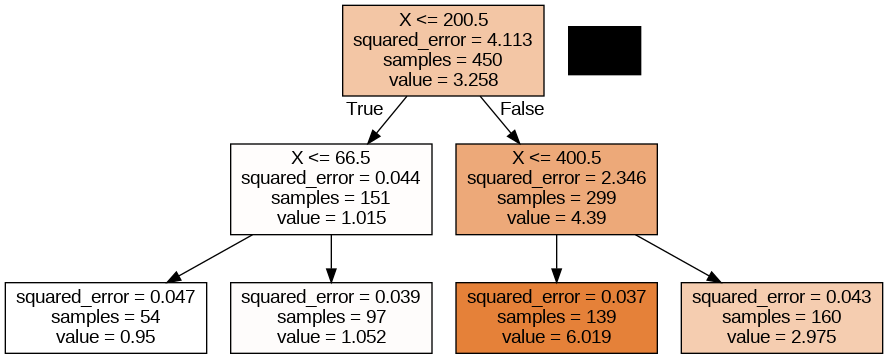

In [ ]:
dot_data = StringIO()
export_graphviz(tree_reg, out_file=dot_data, feature_names=features, filled=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

In [ ]:
#Visualizing Regression Line

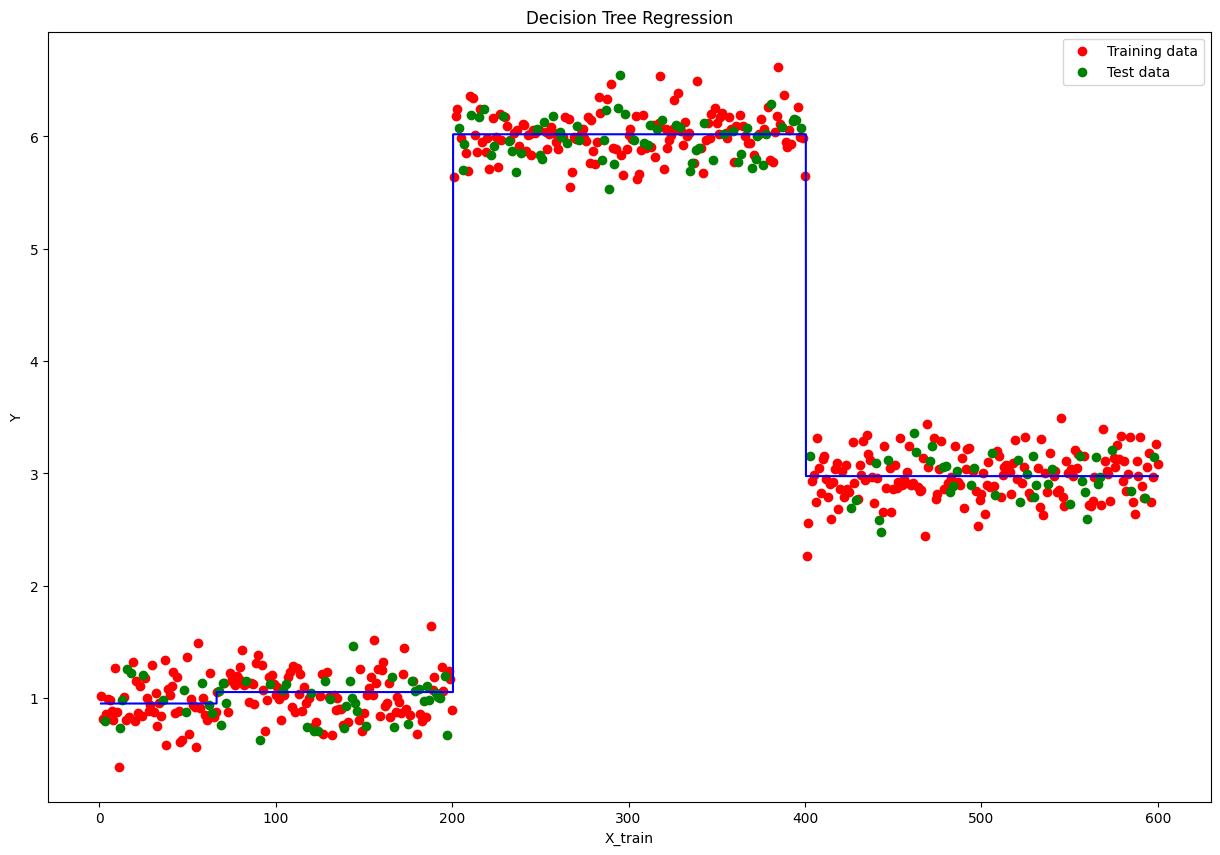

In [ ]:
x_grid = np.arange(min(x_train), max(x_train), 0.01)
x_grid = x_grid.reshape((len(x_grid), 1))
plt.figure(figsize = (15,10))
plt.scatter(x_train, y_train, color = 'red', label = 'Training data')
plt.scatter (x_test, y_test, color = 'green', label = 'Test data')
plt.plot(x_grid, tree_reg.predict(x_grid), color = 'blue')
plt.title('Decision Tree Regression')
plt.xlabel('X_train')
plt.ylabel('Y')
plt.legend()
plt.show()

In [ ]:
!gdown 16KtxSt_QEGQvfluEaMls5cCHPwhRXgCk
!gdown 19L3rYatfhbBL1r5MHrv-p_oM2wlvrhqk
!gdown 1OHLKJwA3qZopKPvlKoRldM6BvA1A4dYF
!gdown 1N7O_fWCTJLu8SIa_paKcDEzllgpMk8sK
!gdown 12Bh2AN8LcZAlg20ehpQrEWccUDaSdsOG

Downloading...
From: https://drive.google.com/uc?id=16KtxSt_QEGQvfluEaMls5cCHPwhRXgCk
To: /content/HR-Employee-Attrition.csv
100% 228k/228k [00:00<00:00, 42.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=19L3rYatfhbBL1r5MHrv-p_oM2wlvrhqk
To: /content/preprocessed_X_sm.pickle
100% 534k/534k [00:00<00:00, 61.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1OHLKJwA3qZopKPvlKoRldM6BvA1A4dYF
To: /content/X_test.pickle
100% 111k/111k [00:00<00:00, 71.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1N7O_fWCTJLu8SIa_paKcDEzllgpMk8sK
To: /content/y_sm.pickle
100% 15.4k/15.4k [00:00<00:00, 23.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=12Bh2AN8LcZAlg20ehpQrEWccUDaSdsOG
To: /content/y_test.pickle
100% 9.49k/9.49k [00:00<00:00, 17.1MB/s]


In [ ]:
import pickle
# Load data (deserialize)
with open('preprocessed_X_sm.pickle', 'rb') as handle:
    x_train = pickle.load(handle)

with open('X_test.pickle', 'rb') as handle:
    x_test = pickle.load(handle)

with open('y_sm.pickle', 'rb') as handle:
    y_train = pickle.load(handle)

with open('y_test.pickle', 'rb') as handle:
    y_test = pickle.load(handle)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=7, max_depth=4)
tree_clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=7)

In [ ]:
print("Train accuracy: {:.2f}".format(tree_clf.score(x_train, y_train)*100))
print("Test accuracy: {:.2f}".format(tree_clf.score(x_test, y_test)*100))

Train accuracy: 83.77
Test accuracy: 78.80


In [ ]:
#RF

In [ ]:
# Load data (deserialize)

with open('preprocessed_X_sm.pickle', 'rb') as handle:
    x= pickle.load(handle)

with open('y_sm.pickle', 'rb') as handle:
    y= pickle.load(handle)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=7, max_depth=4, n_estimators=100)

In [ ]:
from sklearn.model_selection import KFold, cross_validate

kfold = KFold(n_splits=10)
cv_acc_results = cross_validate(rf_clf, x, y, cv=kfold, scoring='accuracy', return_train_score=True)

print(f"K-Fold Accuracy Mean: \n Train: {cv_acc_results['train_score'].mean()*100:.2f} \n Validation: {cv_acc_results['test_score'].mean()*100:.2f}")
print(f"K-Fold Accuracy Std: \n Train: {cv_acc_results['train_score'].std()*100:.2f}, \n Validation: {cv_acc_results['test_score'].std()*100:.2f}")

K-Fold Accuracy Mean: 
 Train: 88.41 
 Validation: 84.26
K-Fold Accuracy Std: 
 Train: 0.45, 
 Validation: 5.96


In [ ]:
# accuracy increased

In [ ]:
# Defining parameters -

params = {
          'n_estimators' : [100,200,300,400],
          'max_depth' : [3,5,10],
          'criterion' : ['gini', 'entropy'],
          'bootstrap' : [True, False],
          'max_features' : [8,9,10]
         }

In [ ]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(estimator = RandomForestClassifier(),
                    param_grid = params,
                    scoring = 'accuracy',
                    cv = 3,
                    n_jobs=-1
                    )

In [ ]:
grid.fit(x,y)

print("Best params: ", grid.best_params_)
print("Best score: ", grid.best_score_)

Best params:  {'bootstrap': True, 'criterion': 'gini', 'max_depth': 10, 'max_features': 8, 'n_estimators': 200}
Best score:  0.8998917748917749


In [ ]:
clf2 = RandomForestClassifier(random_state=7, bootstrap=False, criterion='gini',
                              max_depth=10, max_features=8, n_estimators=200)

kfold = KFold(n_splits=10)
cv_acc_results = cross_validate(clf2, x, y, cv=kfold, scoring='accuracy', return_train_score=True)

print(f"K-Fold Accuracy Mean: \n Train: {cv_acc_results['train_score'].mean()*100:.3f} \n Validation: {cv_acc_results['test_score'].mean()*100:.3f}")
print(f"K-Fold Accuracy Std: \n Train: {cv_acc_results['train_score'].std()*100:.3f}, \n Validation: {cv_acc_results['test_score'].std()*100:.3f}")

K-Fold Accuracy Mean: 
 Train: 99.657 
 Validation: 91.999
K-Fold Accuracy Std: 
 Train: 0.085, 
 Validation: 6.801


In [ ]:
#finding the optimal value of `ccp_alpha` for our model.

In [ ]:
# Defining parameters -

from scipy.stats import uniform

params = {'ccp_alpha': uniform(loc=0, scale=0.4)}
# sample from uniform dist between 0 to 0.4

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

random = RandomizedSearchCV(estimator = RandomForestClassifier(random_state=7, bootstrap=False, criterion='gini',
                                                               max_depth=10, max_features=8, n_estimators=200),
                            param_distributions = params,
                            scoring = 'accuracy',
                            cv = 3,
                            n_iter=15,
                            n_jobs=-1
                            )

In [ ]:
random.fit(x,y)

print("Best param: ", random.best_params_)
print("Best score: ", random.best_score_)

Best param:  {'ccp_alpha': 0.021890846522128762}
Best score:  0.8003246753246754


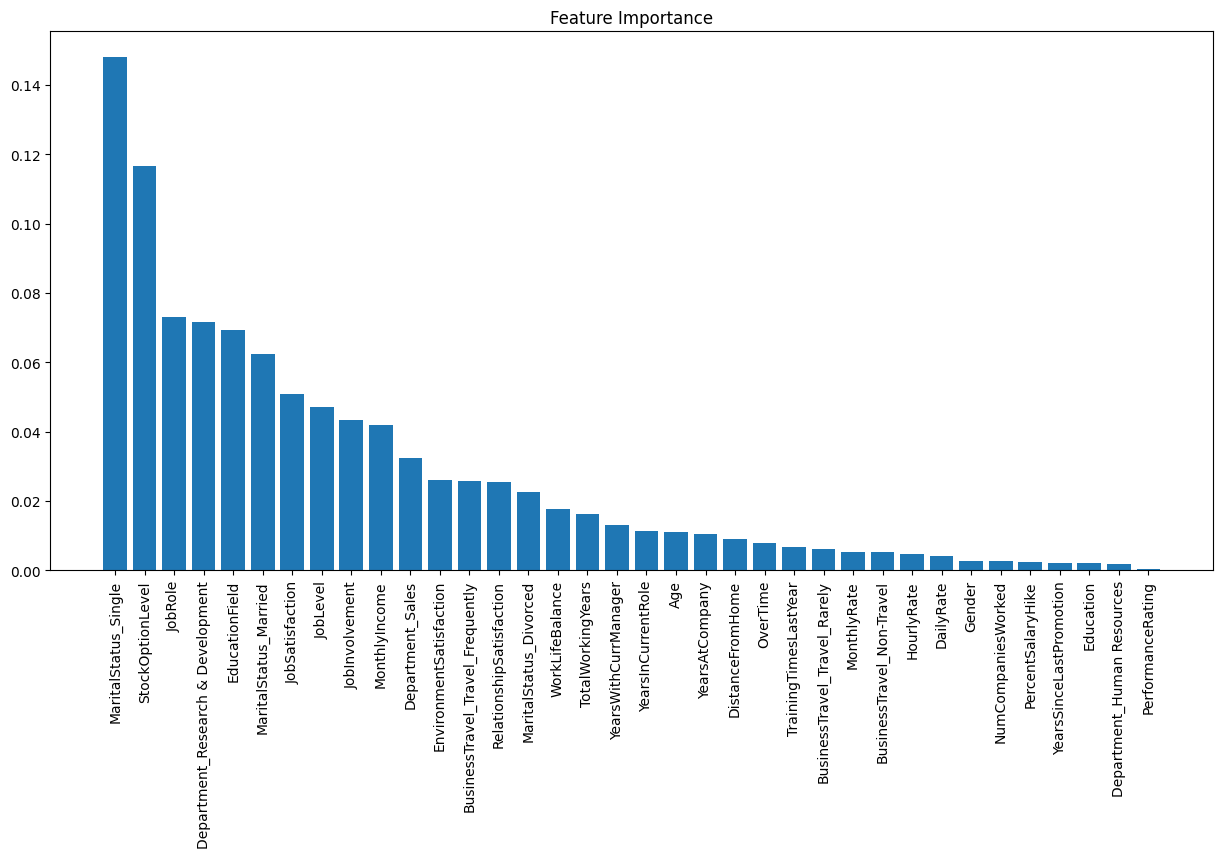

In [ ]:
# Feature Importance

import matplotlib.pyplot as plt

rf_clf.fit(x,y)
importances = rf_clf.feature_importances_

indices = np.argsort(importances)[::-1] # Sort feature importances in descending order
names = [x.columns[i] for i in indices] # Rearrange feature names so they match the sorted feature importances

plt.figure(figsize=(15, 7)) # Create plot
plt.title("Feature Importance") # Create plot title
plt.bar(range(x.shape[1]), importances[indices]) # Add bars
plt.xticks(range(x.shape[1]), names, rotation=90) # Add feature names as x-axis labels
plt.show() # Show plot

In [ ]:
# Sklearn implemntation

In [ ]:
# Gradient Boosting Decision Tree

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gbc = GradientBoostingClassifier(n_estimators=150, max_depth=2, loss = 'log_loss')

In [ ]:
gbc.fit(x_train, y_train)

GradientBoostingClassifier(max_depth=2, n_estimators=150)

In [ ]:
gbc.score(x_test, y_test)

0.8804347826086957

In [ ]:
gbc.score(x_train, y_train)

0.948051948051948

In [ ]:
#Model is slightly overfitting.

In [ ]:
# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn import tree
from sklearn.model_selection import GridSearchCV

params = {
    "max_depth" : [3, 5, 7, 10, 15],
    "max_leaf_nodes" : [20, 40, 60]
}

model1 = DTC()
clf = GridSearchCV(model1, params, scoring = "accuracy", cv=5)

clf.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 5, 7, 10, 15],
                         'max_leaf_nodes': [20, 40, 60]},
             scoring='accuracy')

In [ ]:
#results of our GridSearch

In [ ]:
res = clf.cv_results_

for i in range(len(res["params"])):
  print(f"Parameters:{res['params'][i]} Mean_score: {res['mean_test_score'][i]} Rank: {res['rank_test_score'][i]}")


Parameters:{'max_depth': 3, 'max_leaf_nodes': 20} Mean_score: 0.7538182084523548 Rank: 13
Parameters:{'max_depth': 3, 'max_leaf_nodes': 40} Mean_score: 0.7538182084523548 Rank: 13
Parameters:{'max_depth': 3, 'max_leaf_nodes': 60} Mean_score: 0.7538182084523548 Rank: 13
Parameters:{'max_depth': 5, 'max_leaf_nodes': 20} Mean_score: 0.8258141067897166 Rank: 12
Parameters:{'max_depth': 5, 'max_leaf_nodes': 40} Mean_score: 0.8290558851534462 Rank: 10
Parameters:{'max_depth': 5, 'max_leaf_nodes': 60} Mean_score: 0.8285153446129054 Rank: 11
Parameters:{'max_depth': 7, 'max_leaf_nodes': 20} Mean_score: 0.8333919285138798 Rank: 9
Parameters:{'max_depth': 7, 'max_leaf_nodes': 40} Mean_score: 0.8399003881930712 Rank: 3
Parameters:{'max_depth': 7, 'max_leaf_nodes': 60} Mean_score: 0.8420522961986376 Rank: 2
Parameters:{'max_depth': 10, 'max_leaf_nodes': 20} Mean_score: 0.833933933933934 Rank: 7
Parameters:{'max_depth': 10, 'max_leaf_nodes': 40} Mean_score: 0.8361063502526918 Rank: 6
Parameters:{'m

In [ ]:
print(clf.best_estimator_)


DecisionTreeClassifier(max_depth=15, max_leaf_nodes=60)


In [ ]:
clf = DTC(**clf.best_params_)

In [ ]:
clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=15, max_leaf_nodes=60)

In [ ]:
# train score
clf.score(x_train, y_train)

0.9464285714285714

In [ ]:
# test score
clf.score(x_test, y_test)

0.8070652173913043

In [ ]:
# RF
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn import tree
from sklearn.model_selection import RandomizedSearchCV
import datetime as dt

params = {
    "n_estimators": [10,25,50,100,150,200],
    "max_depth" : [3, 5, 10, 15, 20],
    "max_leaf_nodes" : [20, 40, 80]
}

rfc = RFC(n_jobs = -1)
clf = RandomizedSearchCV(rfc, params, scoring = "accuracy", cv=3, n_jobs = -1, verbose = 1)

start = dt.datetime.now()
clf.fit(x_train, y_train)
end = dt.datetime.now()

Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [ ]:
res = clf.cv_results_

for i in range(len(res["params"])):
  print(f"Parameters:{res['params'][i]} Mean_score: {res['mean_test_score'][i]} Rank: {res['rank_test_score'][i]}")


Parameters:{'n_estimators': 100, 'max_leaf_nodes': 20, 'max_depth': 20} Mean_score: 0.860930735930736 Rank: 8
Parameters:{'n_estimators': 100, 'max_leaf_nodes': 40, 'max_depth': 3} Mean_score: 0.8376623376623377 Rank: 10
Parameters:{'n_estimators': 100, 'max_leaf_nodes': 80, 'max_depth': 20} Mean_score: 0.8961038961038961 Rank: 1
Parameters:{'n_estimators': 150, 'max_leaf_nodes': 80, 'max_depth': 5} Mean_score: 0.8663419913419914 Rank: 3
Parameters:{'n_estimators': 25, 'max_leaf_nodes': 20, 'max_depth': 10} Mean_score: 0.8663419913419914 Rank: 3
Parameters:{'n_estimators': 25, 'max_leaf_nodes': 40, 'max_depth': 20} Mean_score: 0.8674242424242425 Rank: 2
Parameters:{'n_estimators': 25, 'max_leaf_nodes': 20, 'max_depth': 20} Mean_score: 0.862012987012987 Rank: 7
Parameters:{'n_estimators': 10, 'max_leaf_nodes': 40, 'max_depth': 5} Mean_score: 0.8549783549783551 Rank: 9
Parameters:{'n_estimators': 200, 'max_leaf_nodes': 20, 'max_depth': 20} Mean_score: 0.8636363636363636 Rank: 5
Parameter

In [ ]:
#The performance of RF (0.89) is better than DT (0.81)

In [ ]:
print(f"Time taken for fits : {end - start}")

Time taken for fits : 0:00:11.131201


In [ ]:
print(clf.best_estimator_)

RandomForestClassifier(max_depth=20, max_leaf_nodes=80, n_jobs=-1)


In [ ]:
rf = clf.best_estimator_

rf.fit(x_train, y_train)

print("Model acc",rf.score(x_test, y_test))



Model acc 0.8722826086956522


In [ ]:
#GBDT

In [ ]:
params = {
    "n_estimators": [50,100,150,200],
    "max_depth" : [3, 4, 5, 7],
    "max_leaf_nodes" : [20, 40, 80],
    "learning_rate": [0.1, 0.2, 0.3]
}

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier as GBC
from sklearn.model_selection import RandomizedSearchCV
import datetime as dt


gbc = GBC()
clf = RandomizedSearchCV(gbc, params, scoring = "accuracy", cv=3, n_jobs = -1, verbose = 1)

start = dt.datetime.now()

clf.fit(x_train, y_train)

end = dt.datetime.now()



Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [ ]:
res = clf.cv_results_

for i in range(len(res["params"])):
  print(f"Parameters:{res['params'][i]} Mean_score: {res['mean_test_score'][i]} Rank: {res['rank_test_score'][i]}")


Parameters:{'n_estimators': 50, 'max_leaf_nodes': 20, 'max_depth': 5, 'learning_rate': 0.3} Mean_score: 0.8885281385281386 Rank: 7
Parameters:{'n_estimators': 150, 'max_leaf_nodes': 20, 'max_depth': 4, 'learning_rate': 0.3} Mean_score: 0.8906926406926408 Rank: 6
Parameters:{'n_estimators': 150, 'max_leaf_nodes': 20, 'max_depth': 7, 'learning_rate': 0.3} Mean_score: 0.8912337662337663 Rank: 5
Parameters:{'n_estimators': 50, 'max_leaf_nodes': 80, 'max_depth': 7, 'learning_rate': 0.2} Mean_score: 0.8939393939393939 Rank: 2
Parameters:{'n_estimators': 50, 'max_leaf_nodes': 40, 'max_depth': 4, 'learning_rate': 0.1} Mean_score: 0.8831168831168831 Rank: 10
Parameters:{'n_estimators': 100, 'max_leaf_nodes': 20, 'max_depth': 7, 'learning_rate': 0.1} Mean_score: 0.8869047619047619 Rank: 8
Parameters:{'n_estimators': 200, 'max_leaf_nodes': 20, 'max_depth': 5, 'learning_rate': 0.3} Mean_score: 0.8933982683982684 Rank: 3
Parameters:{'n_estimators': 200, 'max_leaf_nodes': 80, 'max_depth': 4, 'learni

In [ ]:
print(f"Time taken for fits : {end - start}")

Time taken for fits : 0:00:28.608332


In [ ]:
print(clf.best_estimator_)

GradientBoostingClassifier(learning_rate=0.3, max_depth=7, max_leaf_nodes=80,
                           n_estimators=150)


In [ ]:
gbc = clf.best_estimator_

gbc.fit(x_train, y_train)

print("Model acc",gbc.score(x_train, y_train))
print("Model acc",gbc.score(x_test, y_test))



Model acc 1.0
Model acc 0.8668478260869565


In [ ]:
#XGBoost
import pickle

!gdown 171Yoe_GSapyrmOnD9oBzHWNOD_OnQs0F
!gdown 1hnIlTPW3AMeB69EbeaXCRIrpMVT1Vwmc
!gdown 1nZtB_RtxMg_MgoRczb8UWQX-AEK_l3qE
!gdown 1zLDUErwKdmF-RacOyHEuI_z_46LssQtP


with open('X_train.pickle', 'rb') as handle:
    x_train = pickle.load(handle)

with open('X_test.pickle', 'rb') as handle:
    x_test = pickle.load(handle)

with open('Y_train.pickle', 'rb') as handle:
    y_train = pickle.load(handle)

with open('Y_test.pickle', 'rb') as handle:
    y_test = pickle.load(handle)

Downloading...
From: https://drive.google.com/uc?id=171Yoe_GSapyrmOnD9oBzHWNOD_OnQs0F
To: /content/Y_test.pickle
100% 31.7k/31.7k [00:00<00:00, 43.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1hnIlTPW3AMeB69EbeaXCRIrpMVT1Vwmc
To: /content/X_test.pickle
100% 253k/253k [00:00<00:00, 108MB/s]
Downloading...
From: https://drive.google.com/uc?id=1nZtB_RtxMg_MgoRczb8UWQX-AEK_l3qE
To: /content/Y_train.pickle
100% 126k/126k [00:00<00:00, 82.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1zLDUErwKdmF-RacOyHEuI_z_46LssQtP
To: /content/X_train.pickle
100% 1.01M/1.01M [00:00<00:00, 83.0MB/s]


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import StratifiedKFold

import datetime as dt

params = {
        "n_estimators": [50,100,150,200],
        "max_depth" : [3, 4, 5, 7],
        "learning_rate": [0.1, 0.2, 0.3],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        }
xgb = XGBClassifier(objective='multi:softmax', num_class=20, silent=True)




In [ ]:
random_search = RandomizedSearchCV(xgb,
                                   param_distributions=params,
                                   n_iter=10,
                                   scoring='accuracy',
                                   n_jobs=-1,
                                   cv=3,
                                   verbose=2)


start = dt.datetime.now()
random_search.fit(x_train, y_train)
end = dt.datetime.now()


Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [ ]:
res = random_search.cv_results_

for i in range(len(res["params"])):
  print(f"Parameters:{res['params'][i]} Mean_score: {res['mean_test_score'][i]} Rank: {res['rank_test_score'][i]}")


Parameters:{'subsample': 0.8, 'n_estimators': 150, 'max_depth': 5, 'learning_rate': 0.2, 'colsample_bytree': 1.0} Mean_score: 0.9646118721461187 Rank: 4
Parameters:{'subsample': 0.8, 'n_estimators': 50, 'max_depth': 4, 'learning_rate': 0.1, 'colsample_bytree': 0.6} Mean_score: 0.9057584982242517 Rank: 10
Parameters:{'subsample': 0.6, 'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.3, 'colsample_bytree': 0.8} Mean_score: 0.965499746321664 Rank: 2
Parameters:{'subsample': 1.0, 'n_estimators': 50, 'max_depth': 5, 'learning_rate': 0.3, 'colsample_bytree': 1.0} Mean_score: 0.952562151192288 Rank: 6
Parameters:{'subsample': 0.6, 'n_estimators': 150, 'max_depth': 7, 'learning_rate': 0.1, 'colsample_bytree': 1.0} Mean_score: 0.9646752917300861 Rank: 3
Parameters:{'subsample': 0.8, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.2, 'colsample_bytree': 0.8} Mean_score: 0.9661339421613394 Rank: 1
Parameters:{'subsample': 0.6, 'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.

In [ ]:
print(f"Time taken for fits : {end - start}")

Time taken for fits : 0:01:51.618300


In [ ]:
print(random_search.best_estimator_)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None, num_class=20,
              num_parallel_tree=None, ...)


In [ ]:
xgb = random_search.best_estimator_

xgb.fit(x_train, y_train)

print("Model acc",xgb.score(x_train, y_train))
print("Model acc",xgb.score(x_test, y_test))



Model acc 1.0
Model acc 0.982247020035506


In [ ]:
#LightGBM
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import datetime as dt
gridParams = {
    'learning_rate': [0.1, 0.3, 0.5],
    'boosting_type' : ['gbdt'],
    'objective' : ['multiclass'],
    'max_depth' : [5,6,7,8],
    'colsample_bytree' : [0.5,0.7],
    'subsample' : [0.5,0.7],
    'metric':['multi_error'],
    }

clf = lgb.LGBMClassifier(num_classes=20)
random_cv = RandomizedSearchCV(clf,gridParams,verbose=3,cv=3,n_jobs = -1,n_iter=10)



In [ ]:
start = dt.datetime.now()
random_cv.fit(x_train,y_train)
end = dt.datetime.now()


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001924 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2040
[LightGBM] [Info] Number of data points in the train set: 15768, number of used features: 8
[LightGBM] [Info] Start training from score -2.982377
[LightGBM] [Info] Start training from score -2.993705
[LightGBM] [Info] Start training from score -3.016753
[LightGBM] [Info] Start training from score -2.986139
[LightGBM] [Info] Start training from score -3.010297
[LightGBM] [Info] Start training from score -3.014166
[LightGBM] [Info] Start training from score -3.037696
[LightGBM] [I

In [ ]:
res = random_cv.cv_results_

for i in range(len(res["params"])):
  print(f"Parameters:{res['params'][i]} Mean_score: {res['mean_test_score'][i]} Rank: {res['rank_test_score'][i]}")


Parameters:{'subsample': 0.5, 'objective': 'multiclass', 'metric': 'multi_error', 'max_depth': 6, 'learning_rate': 0.1, 'colsample_bytree': 0.5, 'boosting_type': 'gbdt'} Mean_score: 0.9564307458143074 Rank: 7
Parameters:{'subsample': 0.7, 'objective': 'multiclass', 'metric': 'multi_error', 'max_depth': 7, 'learning_rate': 0.1, 'colsample_bytree': 0.5, 'boosting_type': 'gbdt'} Mean_score: 0.9595383054287163 Rank: 5
Parameters:{'subsample': 0.7, 'objective': 'multiclass', 'metric': 'multi_error', 'max_depth': 5, 'learning_rate': 0.3, 'colsample_bytree': 0.5, 'boosting_type': 'gbdt'} Mean_score: 0.9629629629629629 Rank: 4
Parameters:{'subsample': 0.5, 'objective': 'multiclass', 'metric': 'multi_error', 'max_depth': 6, 'learning_rate': 0.3, 'colsample_bytree': 0.7, 'boosting_type': 'gbdt'} Mean_score: 0.9693049213597158 Rank: 1
Parameters:{'subsample': 0.7, 'objective': 'multiclass', 'metric': 'multi_error', 'max_depth': 6, 'learning_rate': 0.1, 'colsample_bytree': 0.5, 'boosting_type': 'g

In [ ]:
print(f"Time taken for fits : {end - start}")

Time taken for fits : 0:01:32.498462


In [ ]:
print(random_cv.best_estimator_)

LGBMClassifier(colsample_bytree=0.7, learning_rate=0.3, max_depth=6,
               metric='multi_error', num_classes=20, objective='multiclass',
               subsample=0.5)


In [ ]:
lgb = random_cv.best_estimator_

lgb.fit(x_train, y_train)

print("Model acc",lgb.score(x_test, y_test))



[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002172 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2040
[LightGBM] [Info] Number of data points in the train set: 15768, number of used features: 8
[LightGBM] [Info] Start training from score -2.982377
[LightGBM] [Info] Start training from score -2.993705
[LightGBM] [Info] Start training from score -3.016753
[LightGBM] [Info] Start training from score -2.986139
[LightGBM] [Info] Start training from score -3.010297
[LightGBM] [Info] Start training from score -3.014166
[LightGBM] [Info] Start training from score -3.037696
[LightGBM] [Info] Start training from score -3.011585
[LightGBM] [Info] St

In [ ]:
#other ensemble techniques

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn import feature_extraction, model_selection, naive_bayes, metrics, svm
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
!gdown 1QViUZJ5UIBCgxB_qbOXTLs_2V48w7MWo

df = pd.read_csv('Spam_processed.csv', encoding='latin-1')
df.dropna(inplace = True)

Downloading...
From: https://drive.google.com/uc?id=1QViUZJ5UIBCgxB_qbOXTLs_2V48w7MWo
To: /content/Spam_processed.csv
100% 767k/767k [00:00<00:00, 102MB/s]


In [ ]:
df

,type,message,cleaned_message
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah nt think goes usf lives around though
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,2nd time tried 2 contact u u å750 pound prize ...
5568,0,Will Ì_ b going to esplanade fr home?,ì_ b going esplanade fr home
5569,0,"Pity, * was in mood for that. So...any other s...",pity mood suggestions
5570,0,The guy did some bitching but I acted like i'd...,guy bitching acted like interested buying some...


In [ ]:
# SVM
from sklearn.model_selection import train_test_split

df_x_train, df_x_test, y_train, y_test = train_test_split(df['cleaned_message'], df['type'],
                                                          test_size=0.25, random_state=47)
print([np.shape(df_x_train), np.shape(df_x_test)])

# CountVectorizer
f = feature_extraction.text.CountVectorizer()
x_train = f.fit_transform(df_x_train)
x_test = f.transform(df_x_test)

# StandardScaler
scaler = StandardScaler(with_mean=False) # problems with dense matrix
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

print([np.shape(x_train), np.shape(x_test)])
print(type(x_train))

[(4173,), (1392,)]
[(4173, 7622), (1392, 7622)]
<class 'scipy.sparse._csr.csr_matrix'>


In [ ]:
#linear SVM on the given Spam/Ham data.

In [ ]:
# SVC

from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV

params = {
          'C': [1e-4,  0.001, 0.01, 0.1, 1,10] # which hyperparam value of C do you think will work well?
         }

svc = SVC(class_weight={ 0:0.1, 1:0.5 }, kernel='linear')
clf = GridSearchCV(svc, params, scoring = "f1", cv=3)

clf.fit(x_train, y_train)

GridSearchCV(cv=3,
             estimator=SVC(class_weight={0: 0.1, 1: 0.5}, kernel='linear'),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10]}, scoring='f1')

In [ ]:
res = clf.cv_results_

for i in range(len(res["params"])):
  print(f"Parameters:{res['params'][i]} \n Mean score: {res['mean_test_score'][i]} \n Rank: {res['rank_test_score'][i]}")

Parameters:{'C': 0.0001} 
 Mean score: 0.6566305780023073 
 Rank: 6
Parameters:{'C': 0.001} 
 Mean score: 0.7742322485787693 
 Rank: 1
Parameters:{'C': 0.01} 
 Mean score: 0.767533370474547 
 Rank: 2
Parameters:{'C': 0.1} 
 Mean score: 0.7649416969151316 
 Rank: 3
Parameters:{'C': 1} 
 Mean score: 0.7649416969151316 
 Rank: 3
Parameters:{'C': 10} 
 Mean score: 0.7649416969151316 
 Rank: 3


In [ ]:
# implementing this SVM on the test data.

In [ ]:
svc = SVC(C=0.001,class_weight={ 0:0.1, 1:0.5 }, kernel='linear')

svc.fit(x_train, y_train)

y_pred = svc.predict(x_test)

print(metrics.f1_score(y_test,y_pred))

0.8908554572271387


In [ ]:
#Kernel SVM on a dataset.

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
from sklearn.inspection import DecisionBoundaryDisplay

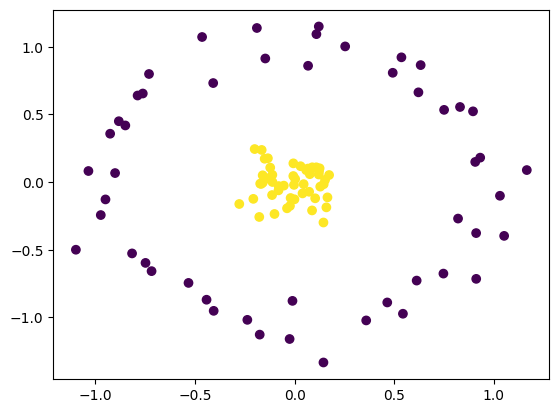

In [ ]:
# create a non-linear dataset

from sklearn.datasets import make_circles
x, y = make_circles(100, factor=.1, noise=.1, random_state=0)
plt.scatter(x[:, 0], x[:, 1], c=y)
plt.show()

In [ ]:
#Linear kernel SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
# try using svm with linear kernel
clf = SVC(kernel='linear').fit(x, y)

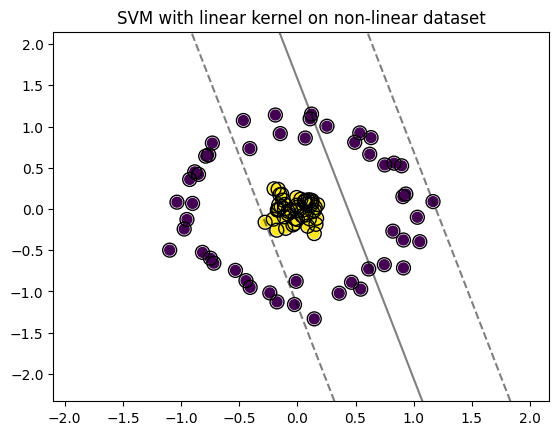

In [ ]:
# plot the decision function

plt.scatter(x[:, 0], x[:, 1], c=y, s=50)
plt.title("SVM with linear kernel on non-linear dataset")

ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    plot_method="contour",
    colors="k",
    levels=[-1, 0, 1],
    alpha=0.5,
    linestyles=["--", "-", "--"],
    ax=ax,
)
# plot support vectors
ax.scatter(
    clf.support_vectors_[:, 0],
    clf.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)
plt.show()

In [ ]:
#RBF kernel SVM

In [ ]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(x, y)

SVC(C=1000000.0)

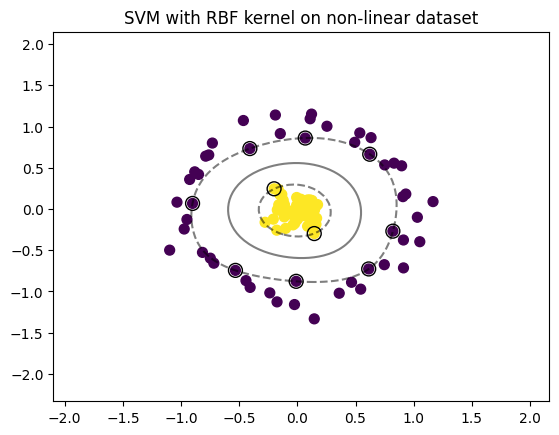

In [ ]:
#plot RBF kernel

plt.scatter(x[:, 0], x[:, 1], c=y, s=50)
plt.title("SVM with RBF kernel on non-linear dataset")

ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    clf,
    x,
    plot_method="contour",
    colors="k",
    levels=[-1, 0, 1],
    alpha=0.5,
    linestyles=["--", "-", "--"],
    ax=ax,
)
# plot support vectors
ax.scatter(
    clf.support_vectors_[:, 0],
    clf.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)
plt.show()